In [98]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import shapiro

1)

In [75]:
df = pd.read_csv("unemployment.csv")
df = df.drop("Country Code",axis=1)
df.head()

,Country Name,1991,1992,1993,1994,1995,1996,1997,1998,1999,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,Africa Eastern and Southern,7.80,7.84,7.85,7.84,7.83,7.84,7.86,7.81,7.79,...,6.56,6.45,6.41,6.49,6.61,6.71,6.73,6.91,7.56,8.11
1,Afghanistan,10.65,10.82,10.72,10.73,11.18,10.96,10.78,10.80,10.81,...,11.34,11.19,11.14,11.13,11.16,11.18,11.15,11.22,11.71,13.28
2,Africa Western and Central,4.42,4.53,4.55,4.54,4.53,4.57,4.60,4.66,4.86,...,4.64,4.41,4.69,4.63,5.57,6.02,6.04,6.06,6.77,6.84
3,Angola,4.21,4.21,4.23,4.16,4.11,4.10,4.09,4.07,4.05,...,7.35,7.37,7.37,7.39,7.41,7.41,7.42,7.42,8.33,8.53
4,Albania,10.31,30.01,25.26,20.84,14.61,13.93,16.88,20.05,20.84,...,13.38,15.87,18.05,17.19,15.42,13.62,12.30,11.47,13.33,11.82


2)

In [76]:
df = df.transpose()
df.head()

,0,1,2,3,4,5,6,7,8,9,...,225,226,227,228,229,230,231,232,233,234
Country Name,Africa Eastern and Southern,Afghanistan,Africa Western and Central,Angola,Albania,Arab World,United Arab Emirates,Argentina,Armenia,Australia,...,"Venezuela, RB",Virgin Islands (U.S.),Vietnam,Vanuatu,World,Samoa,"Yemen, Rep.",South Africa,Zambia,Zimbabwe
1991,7.8,10.65,4.42,4.21,10.31,11.62,1.87,5.44,1.6,9.58,...,9.45,12.35,2.09,1.68,4.8,2.1,8.32,29.95,18.9,4.94
1992,7.84,10.82,4.53,4.21,30.01,12.12,1.84,6.36,1.8,10.73,...,7.69,12.51,1.91,1.69,4.96,2.38,8.31,29.98,19.37,4.99
1993,7.85,10.72,4.55,4.23,25.26,12.86,1.85,10.1,5.3,10.87,...,6.6,12.7,1.97,1.73,5.23,2.63,8.35,29.92,19.7,4.97
1994,7.84,10.73,4.54,4.16,20.84,12.95,1.81,11.76,6.6,9.72,...,8.56,12.47,1.93,1.59,5.49,3.04,8.34,29.89,18.43,4.96


3)

In [77]:
df.columns = df.iloc[0][::]
df.drop(index=df.index[0], axis=0, inplace=True)
df

Country Name,Africa Eastern and Southern,Afghanistan,Africa Western and Central,Angola,Albania,Arab World,United Arab Emirates,Argentina,Armenia,Australia,...,"Venezuela, RB",Virgin Islands (U.S.),Vietnam,Vanuatu,World,Samoa,"Yemen, Rep.",South Africa,Zambia,Zimbabwe
1991,7.8,10.65,4.42,4.21,10.31,11.62,1.87,5.44,1.6,9.58,...,9.45,12.35,2.09,1.68,4.8,2.1,8.32,29.95,18.9,4.94
1992,7.84,10.82,4.53,4.21,30.01,12.12,1.84,6.36,1.8,10.73,...,7.69,12.51,1.91,1.69,4.96,2.38,8.31,29.98,19.37,4.99
1993,7.85,10.72,4.55,4.23,25.26,12.86,1.85,10.1,5.3,10.87,...,6.6,12.7,1.97,1.73,5.23,2.63,8.35,29.92,19.7,4.97
1994,7.84,10.73,4.54,4.16,20.84,12.95,1.81,11.76,6.6,9.72,...,8.56,12.47,1.93,1.59,5.49,3.04,8.34,29.89,18.43,4.96
1995,7.83,11.18,4.53,4.11,14.61,13.32,1.8,18.8,6.7,8.47,...,10.24,12.13,1.9,1.74,5.63,3.19,8.96,29.89,16.81,5.63
1996,7.84,10.96,4.57,4.1,13.93,12.38,1.9,17.11,9.3,8.51,...,11.77,12.21,1.93,1.72,5.7,3.47,9.59,29.87,15.3,6.25
1997,7.86,10.78,4.6,4.09,16.88,11.95,1.98,14.82,10.8,8.36,...,11.16,12.12,2.87,1.68,5.7,3.9,10.2,29.91,13.64,6.93
1998,7.81,10.8,4.66,4.07,20.05,11.97,2.14,12.65,9.4,7.68,...,11.15,11.86,2.29,1.76,5.86,4.18,10.81,29.95,12.0,6.46
1999,7.79,10.81,4.86,4.05,20.84,12.11,2.22,14.05,11.2,6.87,...,14.53,11.5,2.33,1.78,5.97,4.48,11.46,29.91,12.44,6.0
2000,7.72,10.81,4.92,4.03,19.03,12.6,2.25,15.0,11.05,6.28,...,13.99,11.11,2.26,1.69,5.77,4.66,11.56,29.88,12.93,5.69


4)

In [78]:
df = df.dropna()
df = df.drop_duplicates()
df.shape

(31, 235)

5)

In [79]:
df.describe()

Country Name,Africa Eastern and Southern,Afghanistan,Africa Western and Central,Angola,Albania,Arab World,United Arab Emirates,Argentina,Armenia,Australia,...,"Venezuela, RB",Virgin Islands (U.S.),Vietnam,Vanuatu,World,Samoa,"Yemen, Rep.",South Africa,Zambia,Zimbabwe
count,31.00,31.00,31.00,31.00,31.00,31.00,31.00,31.00,31.00,31.00,...,31.0,31.00,31.00,31.00,31.00,31.0,31.00,31.00,31.0,31.00
unique,28.00,26.00,25.00,26.00,29.00,30.00,31.00,31.00,30.00,31.00,...,30.0,30.00,27.00,18.00,26.00,31.0,31.00,27.00,30.0,29.00
top,7.84,10.81,4.55,4.21,20.84,12.47,1.87,5.44,18.44,9.58,...,6.6,12.47,1.93,1.81,5.63,2.1,8.32,29.95,15.3,4.78
freq,3.00,3.00,3.00,2.00,2.00,2.00,1.00,1.00,2.00,1.00,...,2.0,2.00,3.00,4.00,2.00,1.0,1.00,2.00,2.0,2.00


6)

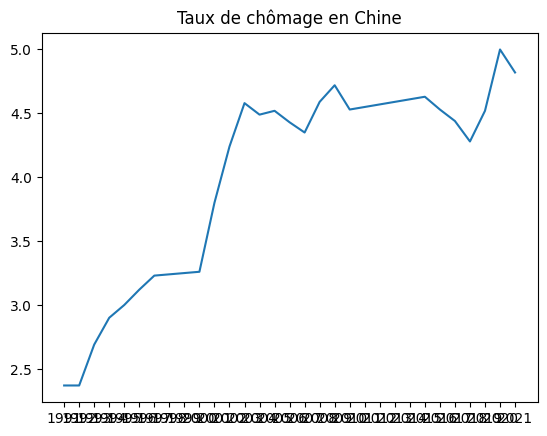

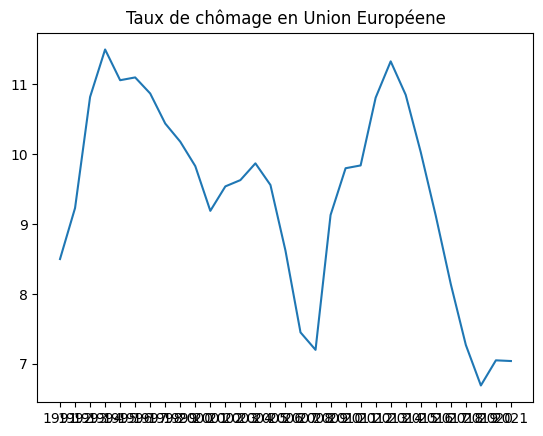

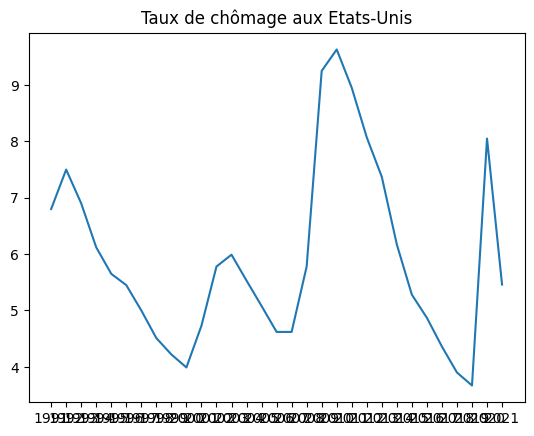

In [80]:
plt.plot(df["China"])
plt.title("Taux de chômage en Chine")
plt.show()
plt.plot(df["European Union"])
plt.title("Taux de chômage en Union Européene")
plt.show()
plt.plot(df["United States"])
plt.title("Taux de chômage aux Etats-Unis")
plt.show()

7)

In [81]:
df[["China"]].describe()

Country Name,China
count,31.00
unique,27.00
top,2.37
freq,2.00


In [84]:
print(df["China"])

1991    2.37
1992    2.37
1993    2.69
1994     2.9
1995     3.0
1996    3.12
1997    3.23
1998    3.24
1999    3.25
2000    3.26
2001     3.8
2002    4.24
2003    4.58
2004    4.49
2005    4.52
2006    4.43
2007    4.35
2008    4.59
2009    4.72
2010    4.53
2011    4.55
2012    4.57
2013    4.59
2014    4.61
2015    4.63
2016    4.53
2017    4.44
2018    4.28
2019    4.52
2020     5.0
2021    4.82
Name: China, dtype: object


8)

In [85]:
df.corr()

Country Name,Africa Eastern and Southern,Afghanistan,Africa Western and Central,Angola,Albania,Arab World,United Arab Emirates,Argentina,Armenia,Australia,...,"Venezuela, RB",Virgin Islands (U.S.),Vietnam,Vanuatu,World,Samoa,"Yemen, Rep.",South Africa,Zambia,Zimbabwe
Country Name,,,,,,,,,,,,,,,,,,,,,
Africa Eastern and Southern,1.000000,-0.036214,0.038746,-0.416393,0.382821,0.850050,-0.022059,0.653847,-0.595069,0.649989,...,0.610934,0.098475,0.631750,-0.029768,0.103049,-0.579341,-0.677963,0.923155,0.745824,0.455864
Afghanistan,-0.036214,1.000000,0.650875,0.526125,-0.425438,-0.233829,0.585255,-0.078782,0.579724,-0.449940,...,-0.289941,0.285080,-0.095504,0.810000,0.469848,0.618546,0.511123,0.106211,-0.265023,-0.173165
Africa Western and Central,0.038746,0.650875,1.000000,0.561361,-0.372645,-0.111267,0.409877,-0.029253,0.577943,-0.293049,...,-0.337567,0.454676,0.123806,0.645834,0.327478,0.654008,0.450819,0.215978,-0.142860,-0.124168
Angola,-0.416393,0.526125,0.561361,1.000000,-0.405299,-0.444482,0.013087,-0.480149,0.792581,-0.370278,...,-0.616205,0.632502,-0.556782,0.597595,0.180348,0.791108,0.621516,-0.359200,-0.435445,-0.198668
Albania,0.382821,-0.425438,-0.372645,-0.405299,1.000000,0.510983,-0.338383,0.129279,-0.555837,0.598933,...,0.270395,-0.021375,0.228887,-0.334895,-0.200838,-0.491477,-0.512206,0.285590,0.437093,0.108443
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Samoa,-0.579341,0.618546,0.654008,0.791108,-0.491477,-0.526268,0.290839,-0.348195,0.897564,-0.687030,...,-0.499590,0.364880,-0.361690,0.660880,0.367016,1.000000,0.886140,-0.368395,-0.714736,-0.332967
"Yemen, Rep.",-0.677963,0.511123,0.450819,0.621516,-0.512206,-0.680242,0.466850,-0.286518,0.893024,-0.907461,...,-0.311102,-0.021674,-0.327991,0.576312,0.487733,0.886140,1.000000,-0.470647,-0.832495,-0.323810
South Africa,0.923155,0.106211,0.215978,-0.359200,0.285590,0.780054,0.140556,0.674886,-0.479964,0.444537,...,0.623072,0.057284,0.665426,0.068424,0.179693,-0.368395,-0.470647,1.000000,0.670557,0.229050


9)

In [ ]:
mean = [[] for i in range (1991, 2022)]
for i in range (1991, 2022):
    for j in range (len(df.keys())):
        mean[i].append(np.mean)


Country Name,Africa Eastern and Southern,Afghanistan,Africa Western and Central,Angola,Albania,Arab World,United Arab Emirates,Argentina,Armenia,Australia,...,Virgin Islands (U.S.),Vietnam,Vanuatu,World,Samoa,"Yemen, Rep.",South Africa,Zambia,Zimbabwe,Mean
1991,7.8,10.65,4.42,4.21,10.31,11.62,1.87,5.44,1.6,9.58,...,12.35,2.09,1.68,4.8,2.1,8.32,29.95,18.9,4.94,8.006119
1992,7.84,10.82,4.53,4.21,30.01,12.12,1.84,6.36,1.8,10.73,...,12.51,1.91,1.69,4.96,2.38,8.31,29.98,19.37,4.99,8.006119
1993,7.85,10.72,4.55,4.23,25.26,12.86,1.85,10.1,5.3,10.87,...,12.7,1.97,1.73,5.23,2.63,8.35,29.92,19.7,4.97,8.006119
1994,7.84,10.73,4.54,4.16,20.84,12.95,1.81,11.76,6.6,9.72,...,12.47,1.93,1.59,5.49,3.04,8.34,29.89,18.43,4.96,8.006119
1995,7.83,11.18,4.53,4.11,14.61,13.32,1.8,18.8,6.7,8.47,...,12.13,1.9,1.74,5.63,3.19,8.96,29.89,16.81,5.63,8.006119


11)

In [103]:
p_val_list = []
for i in range (len(df.keys())):
    stat, p_value = shapiro(df[df.keys()[i]])
    if p_value > 0.05:
        p_val_list.append((df.keys()[i], p_value))
print(p_val_list)

[('Arab World', 0.5838784201431507), ('United Arab Emirates', 0.1356257961380365), ('Austria', 0.6649960899652327), ('Azerbaijan', 0.11426352180013949), ('Belgium', 0.7644449995635108), ('Bulgaria', 0.4695263917534594), ('Bahamas, The', 0.15576220414563885), ('Bosnia and Herzegovina', 0.05317393676179584), ('Brunei Darussalam', 0.17191515574824506), ('Botswana', 0.8550824656954565), ('Central Europe and the Baltics', 0.10920141365287689), ('Switzerland', 0.10641656200280225), ('Channel Islands', 0.32489475036896387), ('Chile', 0.21185200221228684), ("Cote d'Ivoire", 0.13440900363167124), ('Czech Republic', 0.05018320405694341), ('Germany', 0.12425790187331731), ('Djibouti', 0.09869760047256708), ('Denmark', 0.10175716214146707), ('Dominican Republic', 0.21885579819813006), ('Europe & Central Asia (excluding high income)', 0.1595654207032554), ('Europe & Central Asia', 0.09311757081937999), ('Ecuador', 0.13119935398107818), ('Spain', 0.2356776504777754), ('Estonia', 0.8685287508360153),

C:\Users\cabro\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\scipy\stats\_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: Input data has range zero. The results may not be accurate.
  res = hypotest_fun_out(*samples, **kwds)


12)

In [104]:
ct = np.mean(df["China"])
st = np.mean([df.iloc[i]["China"]/ct for i in range (len(df["China"]))])
et = np.mean([df.iloc[i]["China"]/(ct*st) for i in range (len(df["China"]))])